In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_ny=pd.read_csv('nyc_census_tracts.csv',keep_default_na=False, na_values=[""])
data_ny.head()


,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [8]:
data_ny.columns

Index(['CensusTract', 'County', 'Borough', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [3]:
data_census=pd.read_csv('census_block_loc.csv',keep_default_na=False, na_values=[""])
data_census.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [16]:
data_census['BlockCode_11'] = data_census['BlockCode'].apply(lambda x: int(str(x)[0:11]))

In [18]:
df= pd.merge(left=data_ny,right= data_census, how='inner', on=None, left_on='CensusTract', right_on='BlockCode_11',
        left_index=False, right_index=False, sort=True,
        suffixes=('_x', '_y'), copy=True, indicator=False,
        validate=None)
df.head

<bound method NDFrame.head of        CensusTract  County_x        Borough  TotalPop   Men  Women  Hispanic  \
0      36005000100     Bronx          Bronx      7703  7133    570      29.9   
1      36005000100     Bronx          Bronx      7703  7133    570      29.9   
2      36005000100     Bronx          Bronx      7703  7133    570      29.9   
3      36005000100     Bronx          Bronx      7703  7133    570      29.9   
4      36005000100     Bronx          Bronx      7703  7133    570      29.9   
5      36005000100     Bronx          Bronx      7703  7133    570      29.9   
6      36005000100     Bronx          Bronx      7703  7133    570      29.9   
7      36005000100     Bronx          Bronx      7703  7133    570      29.9   
8      36005000100     Bronx          Bronx      7703  7133    570      29.9   
9      36005000100     Bronx          Bronx      7703  7133    570      29.9   
10     36005000100     Bronx          Bronx      7703  7133    570      29.9   
11     360

In [19]:
bike=pd.read_csv('201907-citibike-tripdata.csv',keep_default_na=False, na_values=[""])
bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,897,2019-07-01 00:00:00.1320,2019-07-01 00:14:58.0040,493,W 45 St & 6 Ave,40.756800,-73.982912,454,E 51 St & 1 Ave,40.754557,-73.965930,18340,Subscriber,1966,1
1,267,2019-07-01 00:00:05.1780,2019-07-01 00:04:32.4500,3143,5 Ave & E 78 St,40.776321,-73.964274,3226,W 82 St & Central Park West,40.782750,-73.971370,21458,Customer,1996,1
2,2201,2019-07-01 00:00:05.2130,2019-07-01 00:36:46.7490,317,E 6 St & Avenue B,40.724537,-73.981854,3469,India St & West St,40.731814,-73.959950,39874,Subscriber,1986,1
3,1660,2019-07-01 00:00:08.6010,2019-07-01 00:27:48.8050,249,Harrison St & Hudson St,40.718710,-74.009001,369,Washington Pl & 6 Ave,40.732241,-74.000264,38865,Subscriber,1988,1
4,109,2019-07-01 00:00:12.1580,2019-07-01 00:02:01.5670,3552,W 113 St & Broadway,40.805973,-73.964928,3538,W 110 St & Amsterdam Ave,40.802692,-73.962950,30256,Subscriber,1997,1


In [20]:
bike.columns = bike.columns.str.replace(' ', '_') 
bike.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,897,2019-07-01 00:00:00.1320,2019-07-01 00:14:58.0040,493,W 45 St & 6 Ave,40.756800,-73.982912,454,E 51 St & 1 Ave,40.754557,-73.965930,18340,Subscriber,1966,1
1,267,2019-07-01 00:00:05.1780,2019-07-01 00:04:32.4500,3143,5 Ave & E 78 St,40.776321,-73.964274,3226,W 82 St & Central Park West,40.782750,-73.971370,21458,Customer,1996,1
2,2201,2019-07-01 00:00:05.2130,2019-07-01 00:36:46.7490,317,E 6 St & Avenue B,40.724537,-73.981854,3469,India St & West St,40.731814,-73.959950,39874,Subscriber,1986,1
3,1660,2019-07-01 00:00:08.6010,2019-07-01 00:27:48.8050,249,Harrison St & Hudson St,40.718710,-74.009001,369,Washington Pl & 6 Ave,40.732241,-74.000264,38865,Subscriber,1988,1
4,109,2019-07-01 00:00:12.1580,2019-07-01 00:02:01.5670,3552,W 113 St & Broadway,40.805973,-73.964928,3538,W 110 St & Amsterdam Ave,40.802692,-73.962950,30256,Subscriber,1997,1


In [22]:
df_bike= pd.merge(left=df,right= bike, how='inner', on=None, left_on='Latitude', right_on='start_station_latitude',
        left_index=False, right_index=False, sort=True,
        suffixes=('_x', '_y'), copy=True, indicator=False,
        validate=None)
df.head

<bound method NDFrame.head of        CensusTract  County_x        Borough  TotalPop   Men  Women  Hispanic  \
0      36005000100     Bronx          Bronx      7703  7133    570      29.9   
1      36005000100     Bronx          Bronx      7703  7133    570      29.9   
2      36005000100     Bronx          Bronx      7703  7133    570      29.9   
3      36005000100     Bronx          Bronx      7703  7133    570      29.9   
4      36005000100     Bronx          Bronx      7703  7133    570      29.9   
5      36005000100     Bronx          Bronx      7703  7133    570      29.9   
6      36005000100     Bronx          Bronx      7703  7133    570      29.9   
7      36005000100     Bronx          Bronx      7703  7133    570      29.9   
8      36005000100     Bronx          Bronx      7703  7133    570      29.9   
9      36005000100     Bronx          Bronx      7703  7133    570      29.9   
10     36005000100     Bronx          Bronx      7703  7133    570      29.9   
11     360

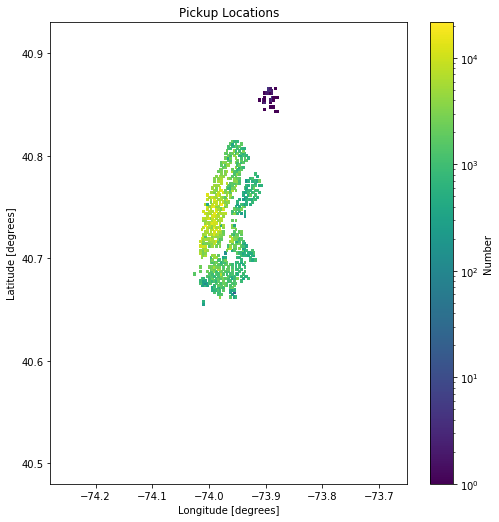

In [28]:
latmin = 40.48
lonmin = -74.28
latmax = 40.93
lonmax = -73.65
# ratio = np.cos(40.7 * np.pi/180) * np.abs(lonmax-lonmin) /np.abs(latmax-latmin)
from matplotlib.colors import LogNorm
fig = plt.figure(1, figsize=(8,ratio*8) )
hist = plt.hist2d(bike.start_station_longitude,bike.start_station_latitude,bins=199,
                  range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Pickup Locations')
plt.colorbar(label='Number')
plt.show()

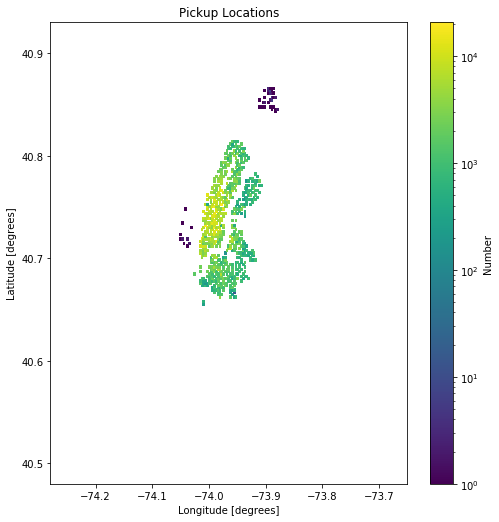

In [29]:
latmin = 40.48
lonmin = -74.28
latmax = 40.93
lonmax = -73.65
# ratio = np.cos(40.7 * np.pi/180) * np.abs(lonmax-lonmin) /np.abs(latmax-latmin)
from matplotlib.colors import LogNorm
fig = plt.figure(1, figsize=(8,ratio*8) )
hist = plt.hist2d(bike.end_station_longitude,bike.end_station_latitude,bins=199,
                  range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Pickup Locations')
plt.colorbar(label='Number')
plt.show()